# 1 

A partir del fichero "US_Crime_Rates_1960_2014", se pide:

1. Tratar el dataset como una serie temporal a partir de la columna Year. Siempre el eje X será el nuevo índice Year.
2. Crea una red neuronal no convolucional de 3 capas y 32, 32, 64 neuronas respectivamente. Entrénala con los datos desde 1960 hasta 2010. Usa los datos desde 2010 hasta 2014 para predecir la columna "Murder" (y). ¿Se aproxima al número real?
3. Ahora, prueba 3 optimizadores diferentes, ¿se modifica el resultado? ¿cuál te ha dado mejores resultados? 
4. Con el mejor optimizador modifica la función de activación a otra diferente. ¿Cuál ha dado mejor resultado?
5. Ahora, haz que la red tenga 7 capas con 17,9,4,16,4,4,4 neuronas respectivamente. Utiliza la mejor función de activación y el mejor optimizador. ¿Esta red da mejor resultado? (Si da problema de memoria, prueba a quitar capas.)
6. Por último, genera una red convolucional con 2 capas convolucionales sin MaxPool, ¿es mejor esta red que las anteriores? Prueba a cambiar la función de activación y el optimizador. ¿Se ha mejorado el resultado? ¿Cuál es mejor?
7. ¿Qué crees que pasaría si entrenamos la red hasta el año 2000 y predecimos desde el 2000 hasta el 2014? (Bonus: realiza el mismo proceso de los ejercicios 2-6 pero entrenando solo hasta el año 2000)

In [1]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras import layers, losses
#from tensorflow.Keras import losses
from collections import Counter

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from datetime import timedelta
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping

import seaborn as sns
import os

import math 

#import pydot



In [3]:
df = pd.read_csv("../data/US_Crime_Rates_1960_2014.csv")
#df.set_index("Year", inplace=True)
df.set_index("Year", inplace=True)


In [4]:
import plotly.express as px

In [5]:
px.line(x=df.index, y=df["Murder"])

In [6]:
X = df.drop("Murder", axis=1)
y = df[["Murder"]]

#Test values: 
X_train =  X.loc[1960:2010].values
y_train = y.loc[1960:2010].values
X_test = X.loc[2011:].values
y_test = y.loc[2011:].values


In [24]:
X_train.shape

(51, 10)

Preguntas: 2, 3, 4:

In [6]:
#Trying different activators with the optimizer that gave the best results (see below)
activator = 'relu'  #--> mse: 19507367936.0  
#activator = 'linear' #--> mse: 2368057901056.0
#activator = 'sigmoid' #--> mse:  326032448.0 * Gives best results * 

model_no_convolucional = tf.keras.Sequential([
layers.Dense(32, activation=activator, input_dim=X_train.shape[1]),
layers.Dense(32, activation=activator),
layers.Dense(64, activation=activator),
layers.Dense(1)])

#optimizer1 -->  mse: 326013696.0   * Gives best results *
#optimizer = tf.keras.optimizers.RMSprop()
#optimizet2 -->  mse: 326056544.0
optimizer = tf.keras.optimizers.Adam()
#optimizer3 --> mse: 326102752.0
#optimizer = tf.keras.optimizers.Adadelta()


model_no_convolucional.compile(loss='mse',
            optimizer=optimizer,
            metrics=['mse'])

model_no_convolucional.summary()

Model: &quot;sequential&quot;
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                352       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 3,585
Trainable params: 3,585
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model_no_convolucional.fit(x = X_train, y = y_train, epochs=200, verbose=1)

ep - loss: 21732354048.0000 - mse: 21732354048.0000
Epoch 21/200
2/2 [==============================] - 0s 5ms/step - loss: 25004734464.0000 - mse: 25004734464.0000
Epoch 22/200
2/2 [==============================] - 0s 3ms/step - loss: 20428111872.0000 - mse: 20428111872.0000
Epoch 23/200
2/2 [==============================] - 0s 5ms/step - loss: 22114662400.0000 - mse: 22114662400.0000
Epoch 24/200
2/2 [==============================] - 0s 3ms/step - loss: 19973062656.0000 - mse: 19973062656.0000
Epoch 25/200
2/2 [==============================] - 0s 2ms/step - loss: 19591929856.0000 - mse: 19591929856.0000
Epoch 26/200
2/2 [==============================] - 0s 3ms/step - loss: 19393679360.0000 - mse: 19393677312.0000
Epoch 27/200
2/2 [==============================] - 0s 3ms/step - loss: 18969255936.0000 - mse: 18969255936.0000
Epoch 28/200
2/2 [==============================] - 0s 7ms/step - loss: 18275002368.0000 - mse: 18275002368.0000
Epoch 29/200
2/2 [==========================

In [11]:
#Getting the smallest mse 
min(history.history['mse'])

104051360.0

dict_keys([&#39;loss&#39;, &#39;mse&#39;])


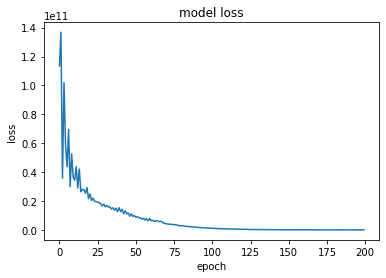

In [12]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [67]:
y_test

array([[14661],
       [14866],
       [14319],
       [14249]], dtype=int64)

In [9]:
y_pred = model_no_convolucional.predict(X_test)
print(y_pred)

[[-487768. ]
 [-498772.5]
 [-532224. ]
 [-568230. ]]


¿Se aproxima al número real? 

No

Pregunta 5: Ahora, haz que la red tenga 7 capas con 17,9,4,16,4,4,4 neuronas respectivamente. Utiliza la mejor función de activación y el mejor optimizador. ¿Esta red da mejor resultado? (Si da problema de memoria, prueba a quitar capas.)

In [69]:
activator = 'sigmoid'
optimizer = 'RMSprop()'

model_no_convolucional_1 = tf.keras.Sequential([
layers.Dense(17, activation=activator, input_dim=X_train.shape[1]),
layers.Dense(9, activation=activator),
layers.Dense(4, activation=activator),
layers.Dense(16, activation=activator),
layers.Dense(4, activation=activator),
layers.Dense(4, activation=activator),
layers.Dense(4, activation=activator),
layers.Dense(1)])

optimizer = tf.keras.optimizers.RMSprop()



model_no_convolucional_1.compile(loss='mse',
            optimizer=optimizer,
            metrics=['mse'])

model_no_convolucional_1.summary()

Model: &quot;sequential_7&quot;
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 17)                187       
_________________________________________________________________
dense_29 (Dense)             (None, 9)                 162       
_________________________________________________________________
dense_30 (Dense)             (None, 4)                 40        
_________________________________________________________________
dense_31 (Dense)             (None, 16)                80        
_________________________________________________________________
dense_32 (Dense)             (None, 4)                 68        
_________________________________________________________________
dense_33 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_34 (Dense)             (None, 4)      

In [70]:
history = model_no_convolucional_1.fit(x = X_train, y = y_train, epochs=15, verbose=1)

Epoch 1/15
2/2 [==============================] - 0s 2ms/step - loss: 326148000.0000 - mse: 326148000.0000
Epoch 2/15
2/2 [==============================] - 0s 2ms/step - loss: 326147072.0000 - mse: 326147072.0000
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 326146400.0000 - mse: 326146400.0000
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 326145856.0000 - mse: 326145856.0000
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 326145312.0000 - mse: 326145312.0000
Epoch 6/15
2/2 [==============================] - 0s 2ms/step - loss: 326144896.0000 - mse: 326144864.0000
Epoch 7/15
2/2 [==============================] - 0s 2ms/step - loss: 326144416.0000 - mse: 326144416.0000
Epoch 8/15
2/2 [==============================] - 0s 3ms/step - loss: 326143968.0000 - mse: 326143968.0000
Epoch 9/15
2/2 [==============================] - 0s 3ms/step - loss: 326143552.0000 - mse: 326143552.0000
Epoch 10/15
2/2 [====================

In [71]:
min(history.history['mse'])

326141152.0

In [ ]:
new model: mse: 326141152.0
previous model:  mse: 326013696.0

So no improvement. 

Pregunta 6: Por último, genera una red convolucional con 2 capas convolucionales sin MaxPool, ¿es mejor esta red que las anteriores? Prueba a cambiar la función de activación y el optimizador. ¿Se ha mejorado el resultado? ¿Cuál es mejor?

In [101]:
X_train.shape

(51, 10)

In [104]:
X_train_1 = X_train.reshape(51, 10, 1)
X_train_1.shape

(51, 10, 1)

In [123]:
#Trying different activators with the optimizer that gave the best results (see below)
#activator = 'relu'  #-->  mse: 344030624.0  
#activator = 'linear' #--> mse: 323865248.0  * Gives best results * 
activator = 'sigmoid' #--> mse:  326020544.0

#model_convolucional2 = tf.keras.Sequential([
#layers.Conv1D(50, 5, activation='relu', batch_input_shape=(None, 10, 1)),
#layers.Conv1D(100, 5, activation='relu'),
#layers.Dense(1)])


model_convolucional2 = tf.keras.Sequential([
layers.Dense(32, activation=activator,batch_input_shape=(None, 10, 1)),
layers.Conv1D(50, 1, activation='relu'),
layers.Dense(32, activation=activator),
layers.Conv1D(100, 1, activation='relu'),
layers.Dense(17, activation=activator),
layers.Dense(1)])


#optimizer1 --> mse: 326079392.0   * Gives best results *
#optimizer = tf.keras.optimizers.RMSprop()
#optimizet2 --> mse: 326083296.0
#optimizer = tf.keras.optimizers.Adam()
#optimizer3 --> mse: 326104352.0
optimizer = tf.keras.optimizers.Adadelta()


model_convolucional2.compile(loss='mse',
            optimizer=optimizer,
            metrics=['mse'])

model_convolucional2.summary()
# batch_input_shape=(None, 51, 10)

Model: &quot;sequential_29&quot;
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 10, 32)            64        
_________________________________________________________________
conv1d_38 (Conv1D)           (None, 10, 50)            1650      
_________________________________________________________________
dense_76 (Dense)             (None, 10, 32)            1632      
_________________________________________________________________
conv1d_39 (Conv1D)           (None, 10, 100)           3300      
_________________________________________________________________
dense_77 (Dense)             (None, 10, 17)            1717      
_________________________________________________________________
dense_78 (Dense)             (None, 10, 1)             18        
Total params: 8,381
Trainable params: 8,381
Non-trainable params: 0
_________________________________________

In [124]:
history = model_convolucional2.fit(x = X_train_1, y = y_train, epochs=15, verbose=1)

Epoch 1/15
2/2 [==============================] - 0s 3ms/step - loss: 326104512.0000 - mse: 326104512.0000
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 326104480.0000 - mse: 326104480.0000
Epoch 3/15
2/2 [==============================] - 0s 6ms/step - loss: 326104448.0000 - mse: 326104448.0000
Epoch 4/15
2/2 [==============================] - 0s 3ms/step - loss: 326104480.0000 - mse: 326104480.0000
Epoch 5/15
2/2 [==============================] - 0s 3ms/step - loss: 326104448.0000 - mse: 326104448.0000
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 326104480.0000 - mse: 326104480.0000
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 326104448.0000 - mse: 326104448.0000
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 326104448.0000 - mse: 326104448.0000
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 326104480.0000 - mse: 326104480.0000
Epoch 10/15
2/2 [====================

In [125]:
min(history.history['mse'])

326104352.0

¿es mejor esta red que las anteriores? Prueba a cambiar la función de activación y el optimizador. ¿Se ha mejorado el resultado? ¿Cuál es mejor?


- The lowest mse with the first model: 326013696
- The lowest mse with the second model:326141152.0
- The lowest mse with the convential model is: 326020544. 


The first model had the lowest mse.

pregunta 7: ¿Qué crees que pasaría si entrenamos la red hasta el año 2000 y predecimos desde el 2000 hasta el 2014? 


The model will probably give higher mse scores, as it has less data to learn. 

----------------------